#### **Import**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist

#### **Get data from file**

In [2]:
data = pd.read_csv("data10.txt", sep="   ", header=None)
data.columns = [f"Var{i}" for i in range(data.shape[1])]

C:\Users\Arseny\AppData\Local\Temp\ipykernel_29192\2255010269.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("data10.txt", sep="   ", header=None)


#### **Plot imported data**

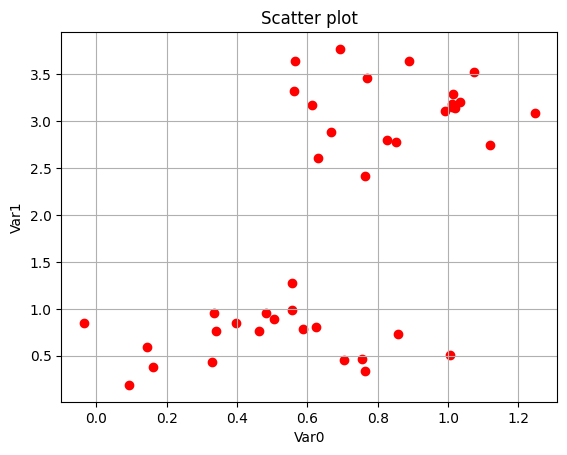

In [3]:
plt.scatter(data.iloc[:, 0].T, data.iloc[:, 1].T, c="red")
plt.title("Scatter plot")
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.grid()

In [4]:
class KohonennNetwork:
    @staticmethod
    def euclidean_distance(point, data, axis=-1):
        """
        Euclidean distance between point & data.
        Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
        """
        return np.sqrt(np.sum((point - data)**2, axis=axis))

    @staticmethod
    def minkowski_distance(x, y, p=4, axis=-1):
        """
        Calculates the Minkowski distance between two points x and y. 
        The parameter p is used to define the order of the distance metric. 
        """
        return np.power(np.sum(np.abs(np.power(x - y, p)), axis=axis), 1.0/p)

    # This class represents a Kohonen network.
    # Method __init__ initializes the network with given parameters.
    def __init__(self, neuron_number, num_itter=10000, learning_rate=0.1, accuracy=1e-4):
        self.num_itter = num_itter
        self.learning_rate = learning_rate
        self.accuracy = accuracy
        self.neuron_number = neuron_number
    
    def get_functional(self, predicted_classes, given_data, C):
        elements_in_clusters = np.array([(given_data.to_numpy())[np.where(predicted_classes == i)] for i in range(self.neuron_number)])
        return np.sum([([self.euclidean_distance(k, j)**2 for k in i]) \
                for i, j in zip(elements_in_clusters, C)])
    
    def predict_(self, data, centers):
        # Calculate the distance from each input data point to every neuron.
        self.data_length_array = np.array([[np.linalg.norm(data.iloc[i, :] - centers[n, :]) for \
            n in range(self.neuron_number)] for i in range(len(data))])
        
        # Find the neuron with the shortest distance from each data point.
        self.predicted_classes = np.argmin(self.data_length_array, axis=-1)
        return self.predicted_classes

    # Method fit trains the network with a given dataset.
    def fit(self, train_set):
        self.data_length = train_set.shape[0]
        self.train_set = train_set
        R = np.zeros(self.neuron_number)
        k = 1
        C = np.array([train_set.iloc[i, :] for i in range(self.neuron_number)])
        
        old_functional = None

        # A while loop is implemented to iterate over the dataset and re-calculate the network's parameters.
        while k < self.num_itter: # (R >= self.accuracy).all()
            num = int(self.data_length*np.random.rand(1, 1)[0][0])
            
            # Calculate the distance from each neuron to the input data point.
            for n in range(self.neuron_number):
                R[n] = pdist(X=np.array([train_set.iloc[num, :].to_numpy(), C[n]]), metric='euclidean')  
                
            # Find the neuron with the shortest distance to the input data point.
            n = np.where(R==np.min(R))[0][0]

            C_new = C
            # Update the weights of the nearest neuron.
            C_new[n][0] += self.learning_rate*(train_set.iloc[num, 0] - C[n][0])   
            C_new[n][1] += self.learning_rate*(train_set.iloc[num, 1] - C[n][1])
            k += 1
            C = C_new
            pred = self.predict_(train_set, C)
            current_functional = self.get_functional(pred, train_set, C)
            if (old_functional != None) and (np.abs(current_functional - old_functional) < self.accuracy):
                break
            old_functional = current_functional
        
        # Store the final weights.
        self.C = C
        self.functional_ = current_functional
    
    # Method predict predicts the class of the input data points.
    def predict(self, test_data):
        # Calculate the distance from each input data point to every neuron.
        self.data_length_array = np.array([[np.linalg.norm(test_data.iloc[i, :] - self.C[n, :]) for \
            n in range(self.neuron_number)] for i in range(self.data_length)])
        
        # Find the neuron with the shortest distance from each data point.
        self.predicted_classes = np.argmin(self.data_length_array, axis=1)
        return self.predicted_classes
        
    # Method visualize plots the final weights and the input data points with their predicted classes.
    def visualize(self):
        plt.scatter(self.C[0], self.C[1], c="black", linewidths=5)
        plt.scatter(self.train_set.iloc[:, 0].T, self.train_set.iloc[:, 1].T, c=self.predicted_classes)
        plt.title('Scatter plot')
        plt.grid()
        plt.xlabel("variable 1")
        plt.ylabel("variable 2")
        plt.title("Scatter plot")

#### **Try this class**

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1]
6.206825088018239


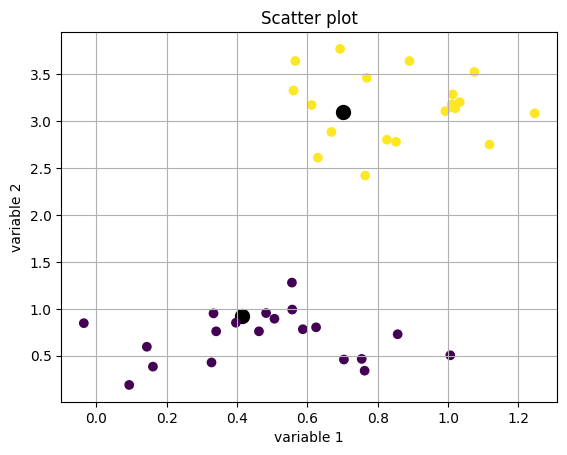

In [5]:
model = KohonennNetwork(neuron_number=2, learning_rate=0.1, accuracy=1e-4, num_itter=2000)
model.fit(data)
print(model.predict(data))
model.visualize()
print(model.functional_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1]
15.252100719567954


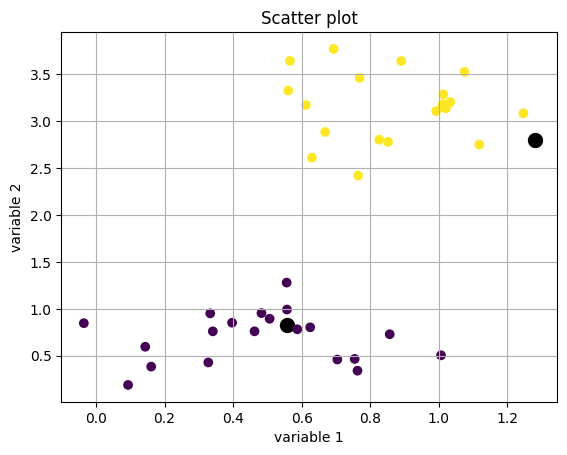

In [6]:
model = KohonennNetwork(neuron_number=2, learning_rate=1)
model.fit(data)
print(model.predict(data))
model.visualize()
print(model.functional_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1]
8.832949168547772


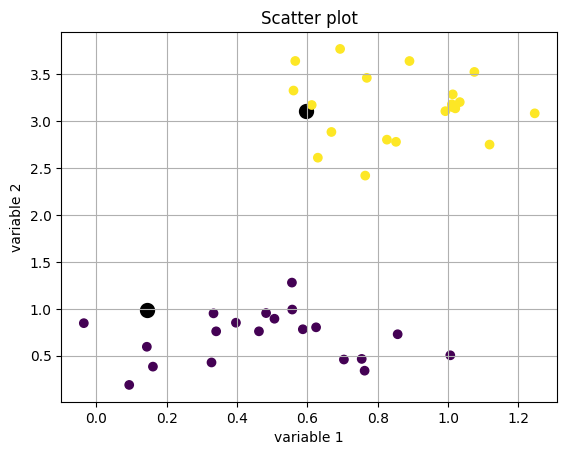

In [8]:
model = KohonennNetwork(neuron_number=2, learning_rate=0.0001)
model.fit(data)
print(model.predict(data))
model.visualize()
print(model.functional_)